In [1]:
# from pathlib import Path
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time

In [3]:
# linear model
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge, HuberRegressor, RANSACRegressor

# boosting model
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# other models
from sklearn.svm import SVR, LinearSVR, NuSVR            
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

In [5]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV ,cross_val_score ,cross_validate
# from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
# from yellowbrick.model_selection import ValidationCurve, LearningCurve

In [ ]:
df_all = pd.read_pickle('data/merged data7.pkl.zip')
df_all.reset_index(drop=True, inplace=True)

In [ ]:
df_all['Ticker_code'] = df_all['Ticker'].astype('category').cat.codes
# df_all['date_period'] = (df_all['date'] - min(df_all['date'])).dt.days + 1
df_all.sort_values('date', inplace=True)

In [8]:
df_data = df_all[list(df_all.columns[3:])]
df_target = df_all['alpha']

# Elastic Net

In [38]:
model_en = ElasticNet(alpha = 0.01, l1_ratio = 0.1)
model_en.fit(df_data, df_target)

ElasticNet(alpha=0.01, l1_ratio=0.1)

In [39]:
df_feature_en = pd.DataFrame(model_en.coef_, index = df_data.columns, columns = ['coefficients'])
df_feature_en = df_feature_en.reset_index().sort_values('coefficients', ascending = False)

<Axes: xlabel='coefficients', ylabel='index'>

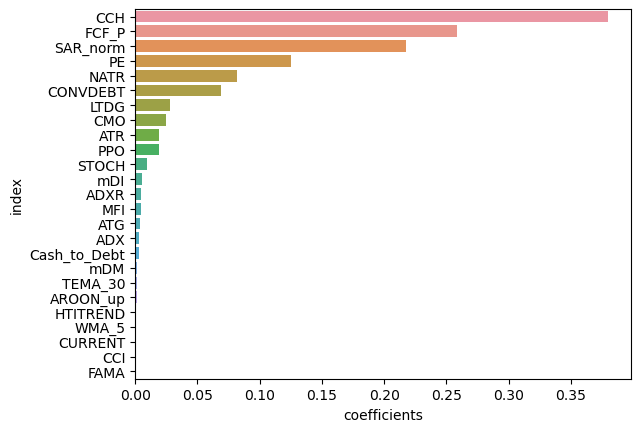

In [40]:
sns.barplot(x='coefficients', y='index', data = df_feature_en[:25])
# fig.savefig('figure storage/feature_importance_elastic net.png')

# Ridge

In [41]:
model_rid = Ridge(alpha = 10, max_iter = 500)
model_rid.fit(df_data, df_target)

Ridge(alpha=10, max_iter=500)

In [42]:
df_importance_rid = pd.DataFrame(model_rid.coef_, index = df_data.columns, columns = ['coefficients'])
df_importance_rid = df_importance_rid.reset_index().sort_values('coefficients', ascending = False)

<Axes: xlabel='coefficients', ylabel='index'>

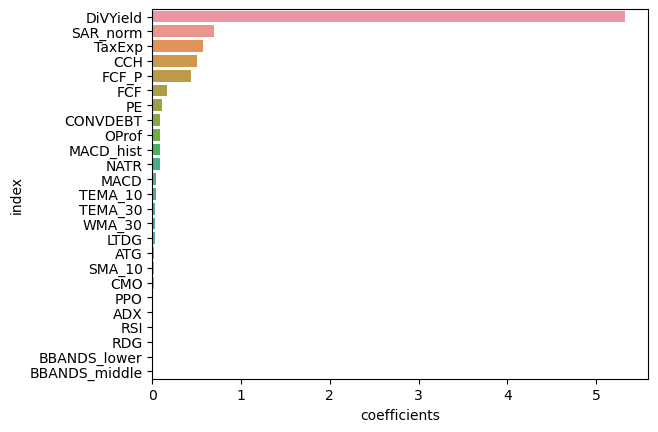

In [43]:
sns.barplot(x='coefficients', y='index', data = df_importance_rid[:25])

# lightgbm

In [35]:
model_lgbm = LGBMRegressor(learning_rate = 0.1, max_depth = 3, num_leaves = 30)
model_lgbm.fit(df_data, df_target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21198
[LightGBM] [Info] Number of data points in the train set: 296888, number of used features: 87
[LightGBM] [Info] Start training from score -0.642205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMRegressor(max_depth=3, num_leaves=30)

In [36]:
df_importance_lgbm = pd.DataFrame(model_lgbm.feature_importances_, index = df_data.columns, columns = ['importance'])
df_importance_lgbm = df_importance_lgbm.reset_index().sort_values(by = 'importance', ascending = False)

<Axes: xlabel='importance', ylabel='index'>

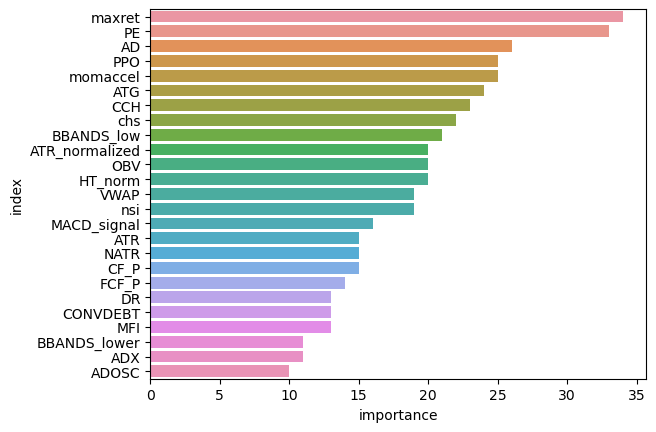

In [37]:
sns.barplot(x='importance', y='index', data=df_importance_lgbm[:25])
# fig.savefig('figure storage/feature_importance_lightgbm.png')

# catboost

In [32]:
model_cat = CatBoostRegressor()
model_cat.fit(df_data, df_target)

Learning rate set to 0.100658
0:	learn: 1.2297825	total: 11.5ms	remaining: 11.5s
1:	learn: 1.2006834	total: 21.4ms	remaining: 10.7s
2:	learn: 1.1744958	total: 31.6ms	remaining: 10.5s
3:	learn: 1.1526819	total: 43.6ms	remaining: 10.9s
4:	learn: 1.1329989	total: 53.9ms	remaining: 10.7s
5:	learn: 1.1156155	total: 65.5ms	remaining: 10.9s
6:	learn: 1.1004649	total: 75.9ms	remaining: 10.8s
7:	learn: 1.0872139	total: 87.1ms	remaining: 10.8s
8:	learn: 1.0742144	total: 99.2ms	remaining: 10.9s
9:	learn: 1.0621620	total: 109ms	remaining: 10.8s
10:	learn: 1.0516516	total: 120ms	remaining: 10.8s
11:	learn: 1.0425563	total: 131ms	remaining: 10.8s
12:	learn: 1.0337661	total: 142ms	remaining: 10.8s
13:	learn: 1.0255118	total: 152ms	remaining: 10.7s
14:	learn: 1.0190904	total: 163ms	remaining: 10.7s
15:	learn: 1.0118076	total: 174ms	remaining: 10.7s
16:	learn: 1.0059371	total: 185ms	remaining: 10.7s
17:	learn: 1.0003734	total: 195ms	remaining: 10.7s
18:	learn: 0.9946573	total: 206ms	remaining: 10.6s
19

In [33]:
df_importance_cat = pd.DataFrame(model_cat.feature_importances_, index = df_data.columns, columns = ['importance'])
df_importance_cat = df_importance_cat.reset_index().sort_values(by = 'importance', ascending = False)

<Axes: xlabel='importance', ylabel='index'>

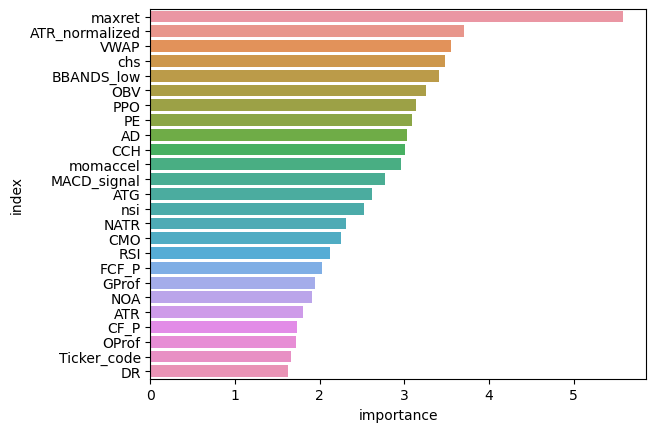

In [34]:
sns.barplot(x='importance', y='index', data=df_importance_cat[:25])

In [44]:
df_all

,date,Ticker,alpha,SMA_5,SMA_10,SMA_30,WMA_5,WMA_10,WMA_30,TEMA_5,...,PE,QUICK,RD_SALE,RDG,RD_P,SECUDEBT,ATG,LTDG,Ticker_code,date_period
0,2019-01-02,AAL,-0.640464,31.5980,31.86600,34.894000,31.886000,31.746909,33.584882,32.150556,...,0.129648,-0.484585,0.000000,0.000000,0.000000,1.056683,-0.004465,-0.098033,0,1
76738,2019-01-02,DARE,-0.456135,0.6748,0.68124,0.800020,0.679747,0.687427,0.749272,0.694893,...,-1.417800,-8.452203,0.000000,0.448833,0.178304,0.000000,0.535995,-0.442857,61,1
279276,2019-01-02,WATT,-0.463199,5.6060,5.65200,7.077333,5.830667,5.615455,6.486925,5.998675,...,-0.321009,-7.824674,34.480000,-0.065613,0.054966,0.000000,-0.303804,0.027216,222,1
221408,2019-01-02,RIOT,-1.204245,1.5300,1.63100,1.752667,1.544667,1.577455,1.662935,1.528281,...,-0.731837,-0.853501,0.000000,0.448833,0.000000,0.000000,-0.551171,-3.868365,176,1
47804,2019-01-02,CDNS,-1.023365,42.6260,42.28500,43.412333,43.098667,42.482545,43.059054,43.672157,...,0.016762,-1.584727,0.420318,0.022890,0.018335,0.000000,0.014454,0.215295,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189957,2023-12-29,ODP,-1.678880,57.3600,54.88500,49.611667,57.618667,56.278182,51.377634,57.985120,...,0.105159,-0.552273,0.000000,0.000000,0.000000,0.093642,0.095811,0.032203,150,1823
188699,2023-12-29,NWSA,-1.833732,24.1360,23.78900,22.502333,24.301333,24.002364,23.022280,24.616036,...,0.017862,-1.182417,0.000000,0.000000,0.000000,0.243117,-0.005211,-0.010445,149,1823
187441,2023-12-29,NWL,-2.404431,8.6960,8.71050,8.141833,8.723333,8.696091,8.408183,8.780577,...,0.061822,-0.652534,0.016783,0.040399,0.000000,0.000190,0.146481,0.133553,148,1823
202537,2023-12-29,PAYX,-2.107172,119.5020,123.55700,122.241333,119.529333,121.794182,123.269527,118.656224,...,0.035475,-1.237625,0.000000,0.000000,0.000000,0.000000,-0.317467,-0.438123,160,1823
